In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
sns.set_theme()
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle

In [294]:
path='/content/drive/MyDrive/Colab Notebooks/Glass Dataset.csv'
glass=pd.read_csv(path,header=0)

In [295]:
glass.head()

,No,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1




```

```

# Data PreProcessing

In [296]:
glass.shape

(214, 11)

In [297]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   AI      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [298]:
glass.describe(include='all')

,No,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [299]:
glass.drop(['No'],inplace=True,axis=1)

In [300]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
AI      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [301]:
glass.head()

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [302]:
glass.rename(columns={'RI':'RefractiveIndex(RI)','Na':'Sodium(Na)','Mg':'Magnesium(Mg)','AI':'Aluminium(AI)','Si':'Silicon(Si)','K':'Potassium(K)','Ca':'Calcium(Ca)','Ba':'Barium(Ba)','Fe':'Iron(Fe)'},inplace=True)

In [303]:
glass.head()

,RefractiveIndex(RI),Sodium(Na),Magnesium(Mg),Aluminium(AI),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [304]:
round(glass.dropna().sum(),3)

RefractiveIndex(RI)      324.93
Sodium(Na)              2869.28
Magnesium(Mg)            574.49
Aluminium(AI)            309.21
Silicon(Si)            15547.30
Potassium(K)             106.37
Calcium(Ca)             1916.79
Barium(Ba)                37.46
Iron(Fe)                  12.20
Type                     595.00
dtype: float64

In [305]:
glass.duplicated().value_counts().to_frame('Values')

,Values
False,213
True,1


In [306]:
duplicates=glass[glass.duplicated()]
print('Duplicate rows :- ')
duplicates

Duplicate rows :- 


,RefractiveIndex(RI),Sodium(Na),Magnesium(Mg),Aluminium(AI),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [307]:
glass.drop_duplicates(inplace=True)

In [308]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7])

# EDA

Text(0.5, 1.0, 'Distribution of Classes')

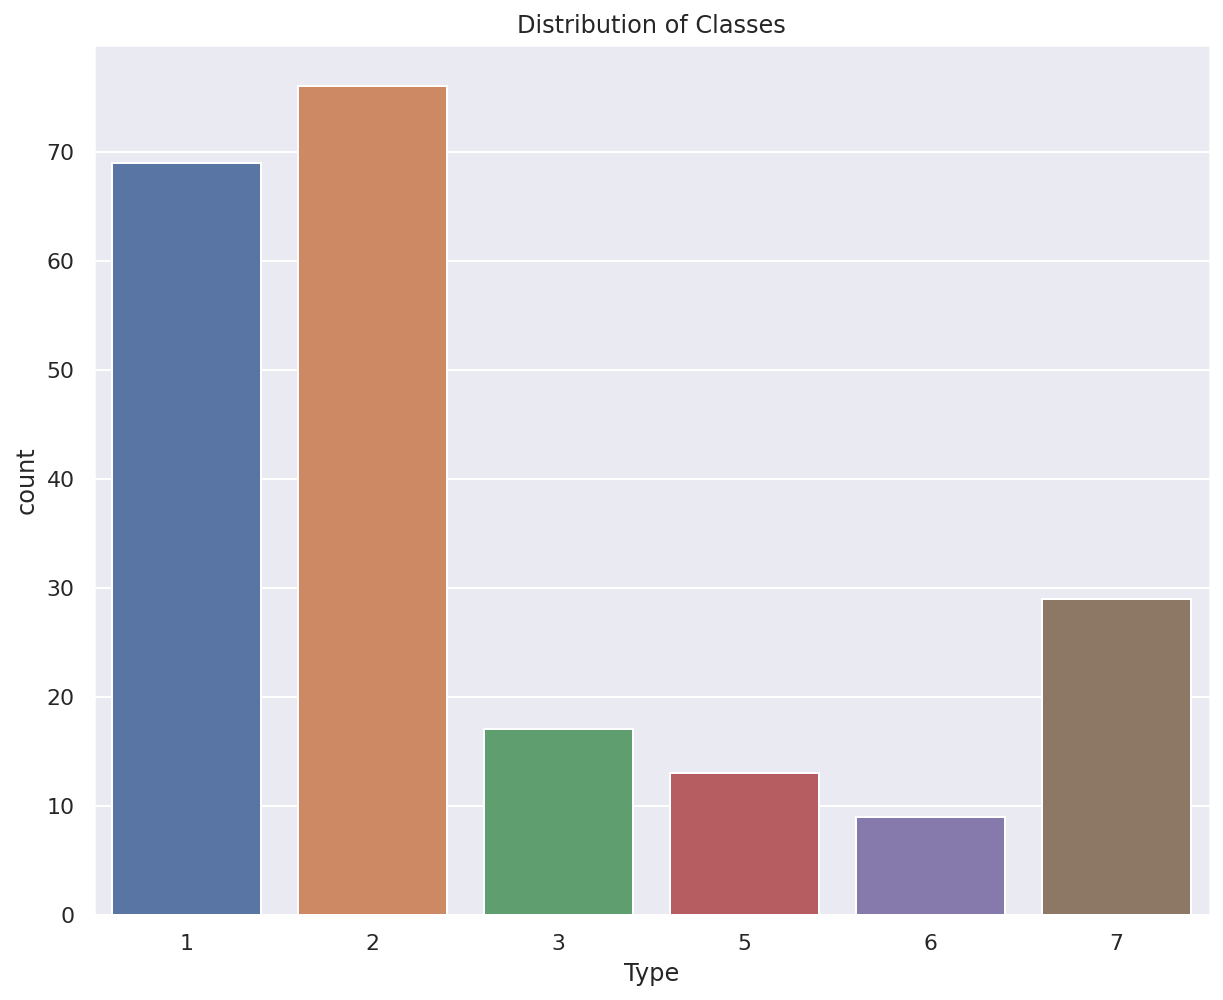

In [309]:
plt.figure(figsize=(10,8))
sns.countplot(glass['Type'])
plt.title('Distribution of Classes')

In [329]:
glass.Type.value_counts().to_frame('Number of Cases')

,Number of Cases
2,76
1,69
7,29
3,17
5,13
6,9


In [310]:
glass.var()

RefractiveIndex(RI)    0.000009
Sodium(Na)             0.666937
Magnesium(Mg)          2.084244
Aluminium(AI)          0.245942
Silicon(Si)            0.599073
Potassium(K)           0.426651
Calcium(Ca)            2.033138
Barium(Ba)             0.248248
Iron(Fe)               0.009524
Type                   4.431571
dtype: float64

In [311]:
glass.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
RefractiveIndex(RI),1.648017,5.038907
Sodium(Na),0.465699,3.083933
Magnesium(Mg),-1.146096,-0.426338
Aluminium(AI),0.938402,2.116563
Silicon(Si),-0.744646,3.021864
Potassium(K),6.545429,54.542640
Calcium(Ca),2.050752,6.671054
Barium(Ba),3.406749,12.464936
Iron(Fe),1.747173,2.634023
Type,1.108861,-0.294177


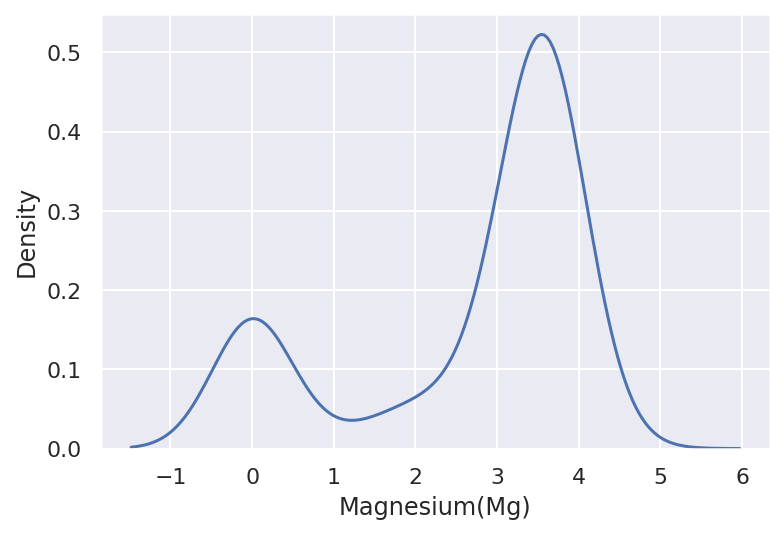

In [312]:
sns.kdeplot(x='Magnesium(Mg)',data=glass)

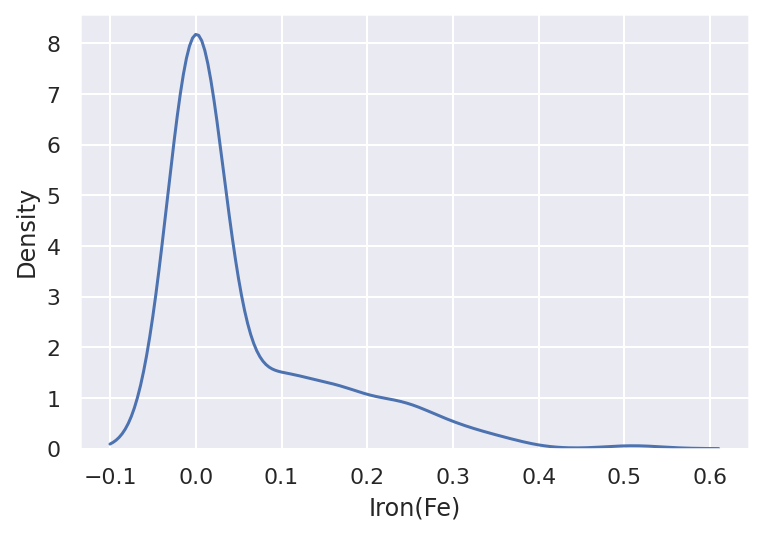

In [313]:
sns.kdeplot(x='Iron(Fe)',data=glass)

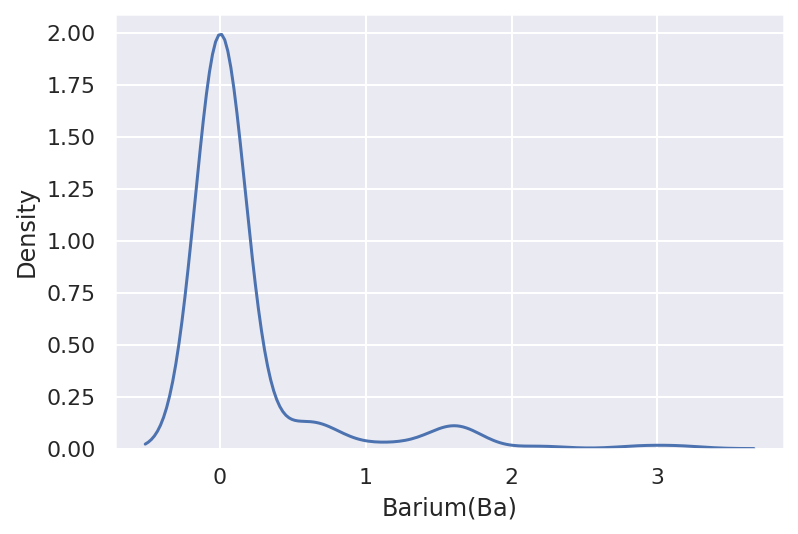

In [314]:
sns.kdeplot(x='Barium(Ba)',data=glass)

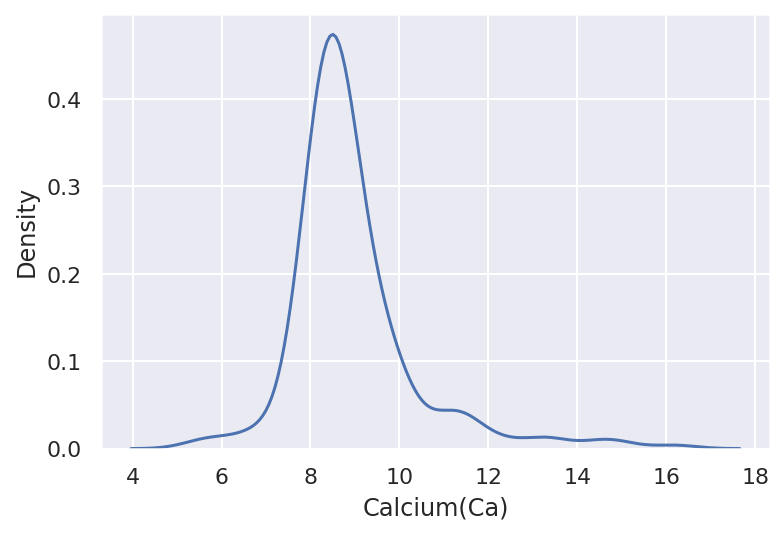

In [315]:
sns.kdeplot(x='Calcium(Ca)',data=glass)

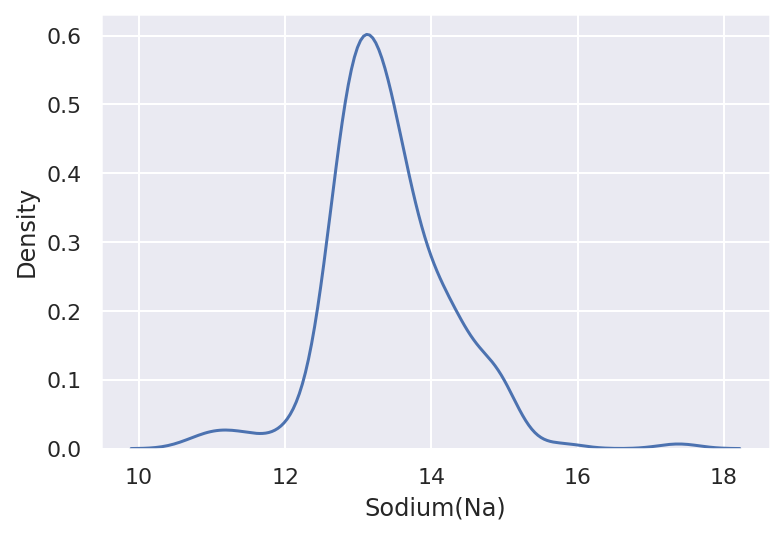

In [316]:
sns.kdeplot(x='Sodium(Na)',data=glass)

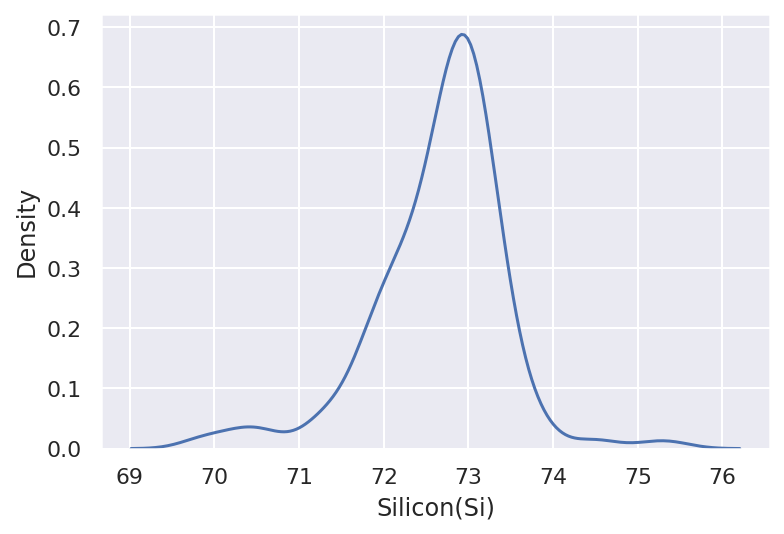

In [317]:
sns.kdeplot(x='Silicon(Si)',data=glass)

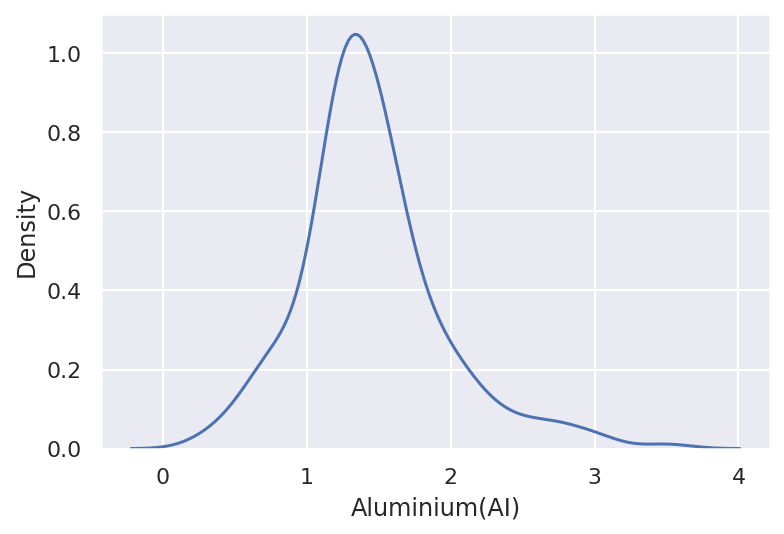

In [318]:
sns.kdeplot(x='Aluminium(AI)',data=glass)

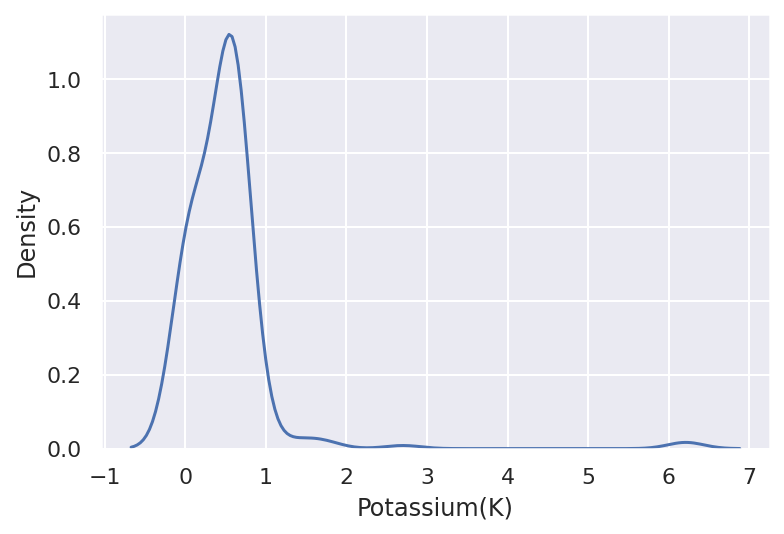

In [319]:
sns.kdeplot(x='Potassium(K)',data=glass)


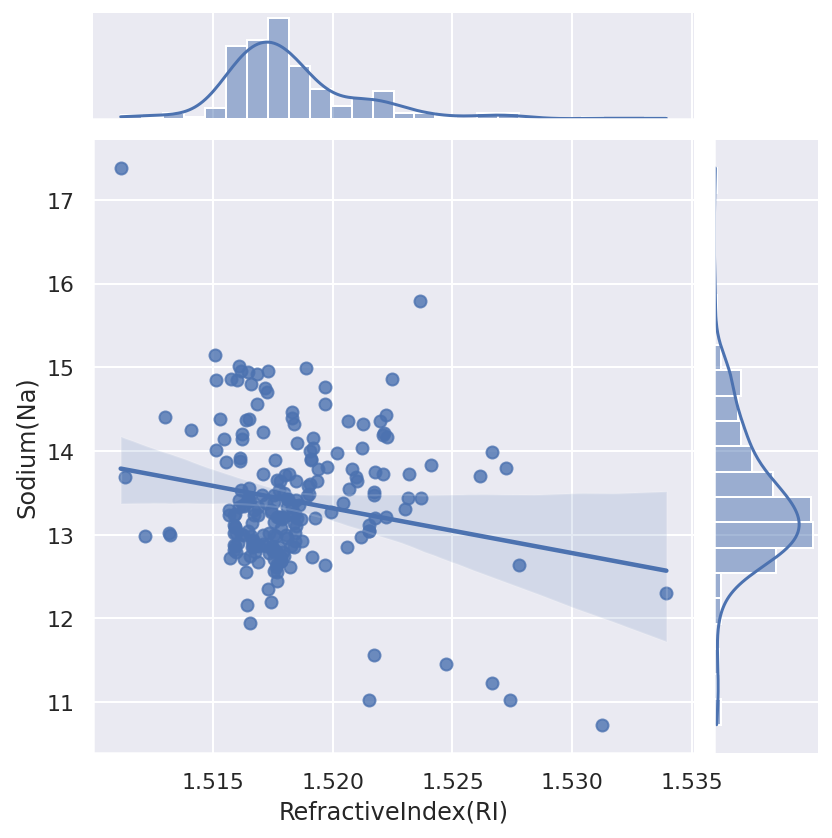

In [320]:
sns.jointplot(x='RefractiveIndex(RI)',y='Sodium(Na)',data=glass,kind='reg')

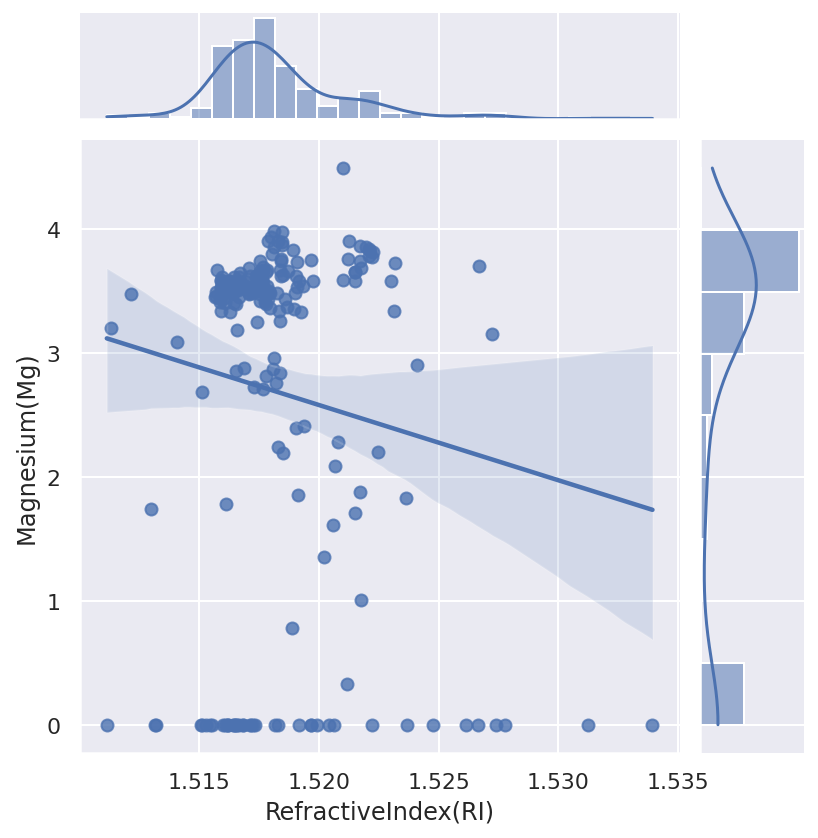

In [321]:
sns.jointplot(x='RefractiveIndex(RI)',y='Magnesium(Mg)',data=glass,kind='reg')

**Visualising the outliers**

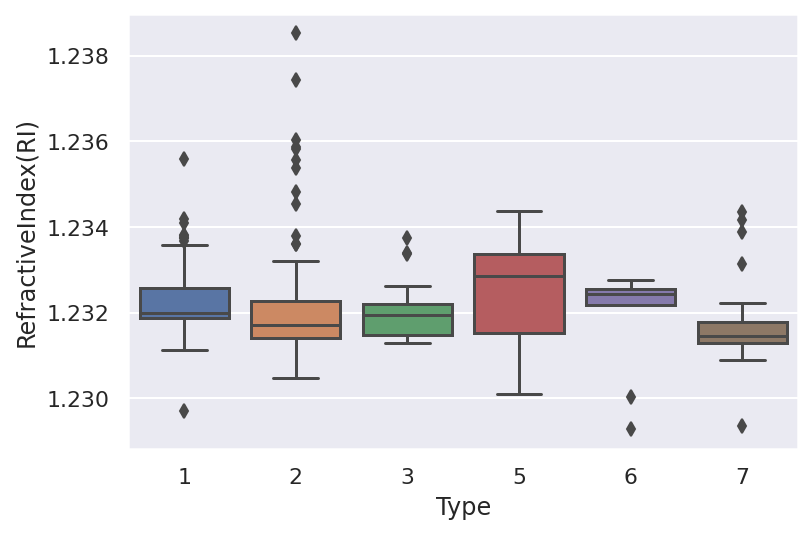

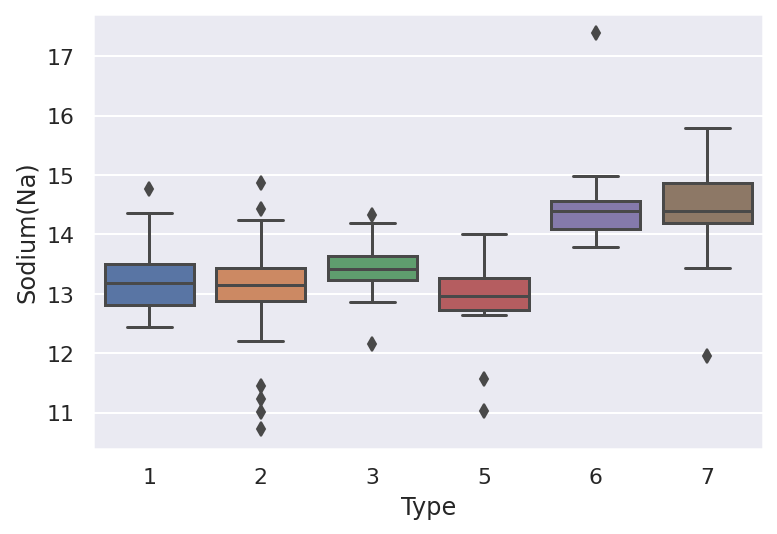

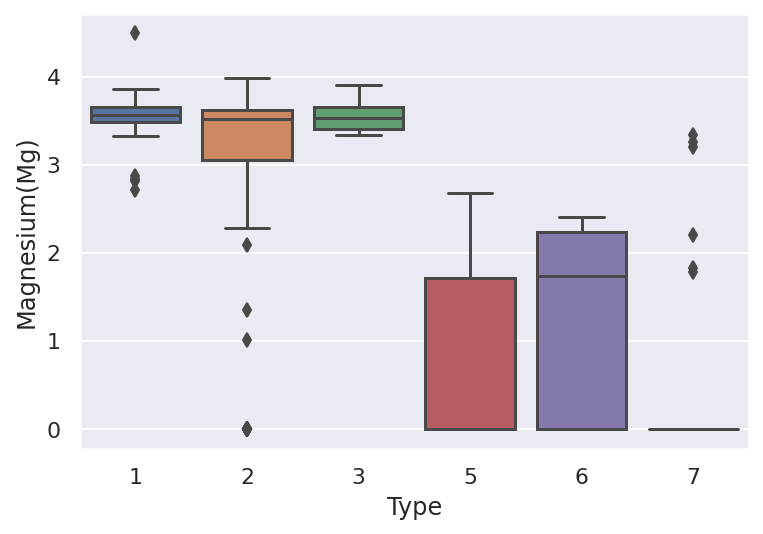

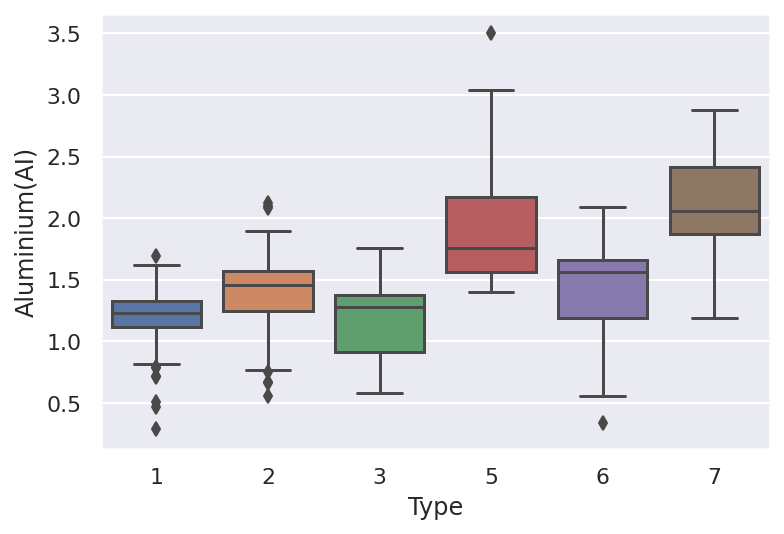

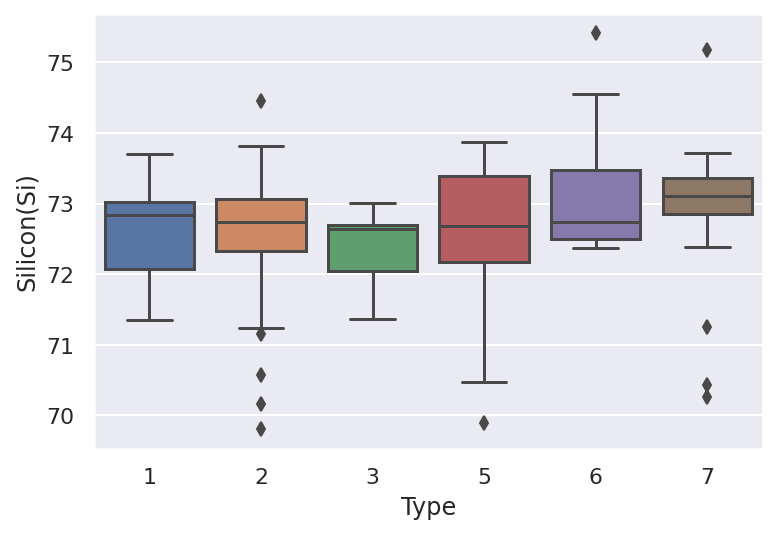

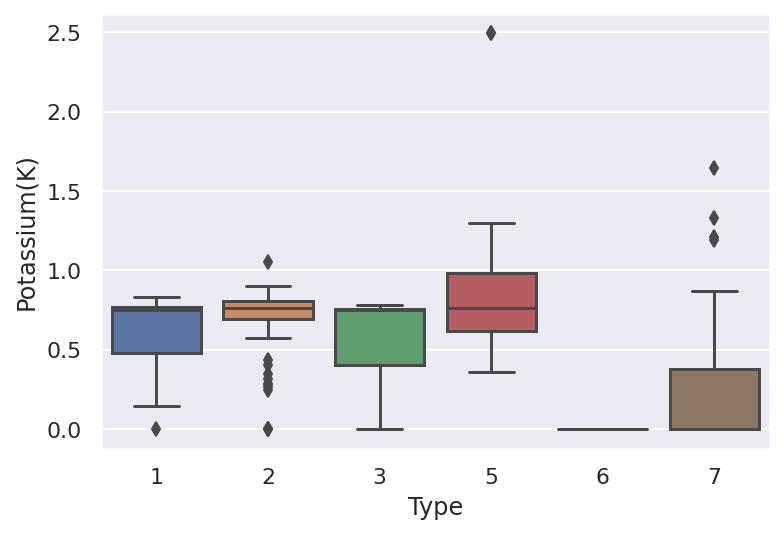

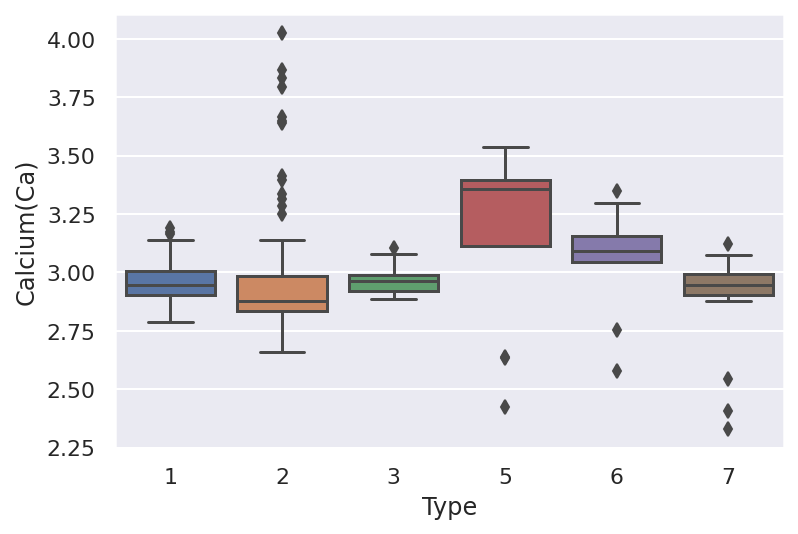

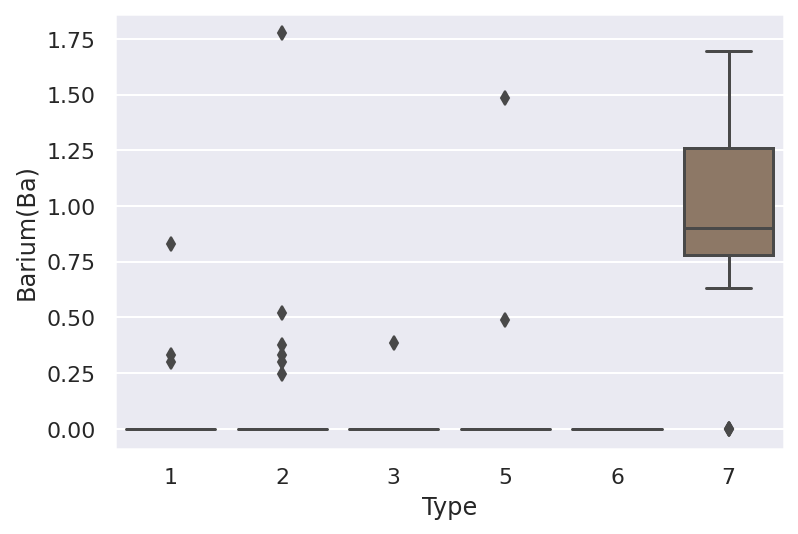

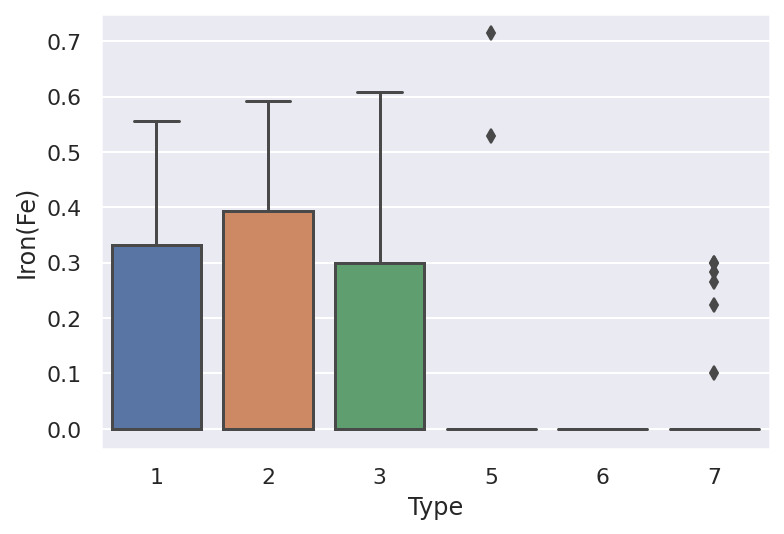

In [338]:
col = ['RefractiveIndex(RI)', 'Sodium(Na)', 'Magnesium(Mg)', 'Aluminium(AI)',
       'Silicon(Si)', 'Potassium(K)', 'Calcium(Ca)', 'Barium(Ba)', 'Iron(Fe)']

for i in range(0,9):
  sns.boxplot(y=col[i],x='Type',data=glass)
  plt.show()

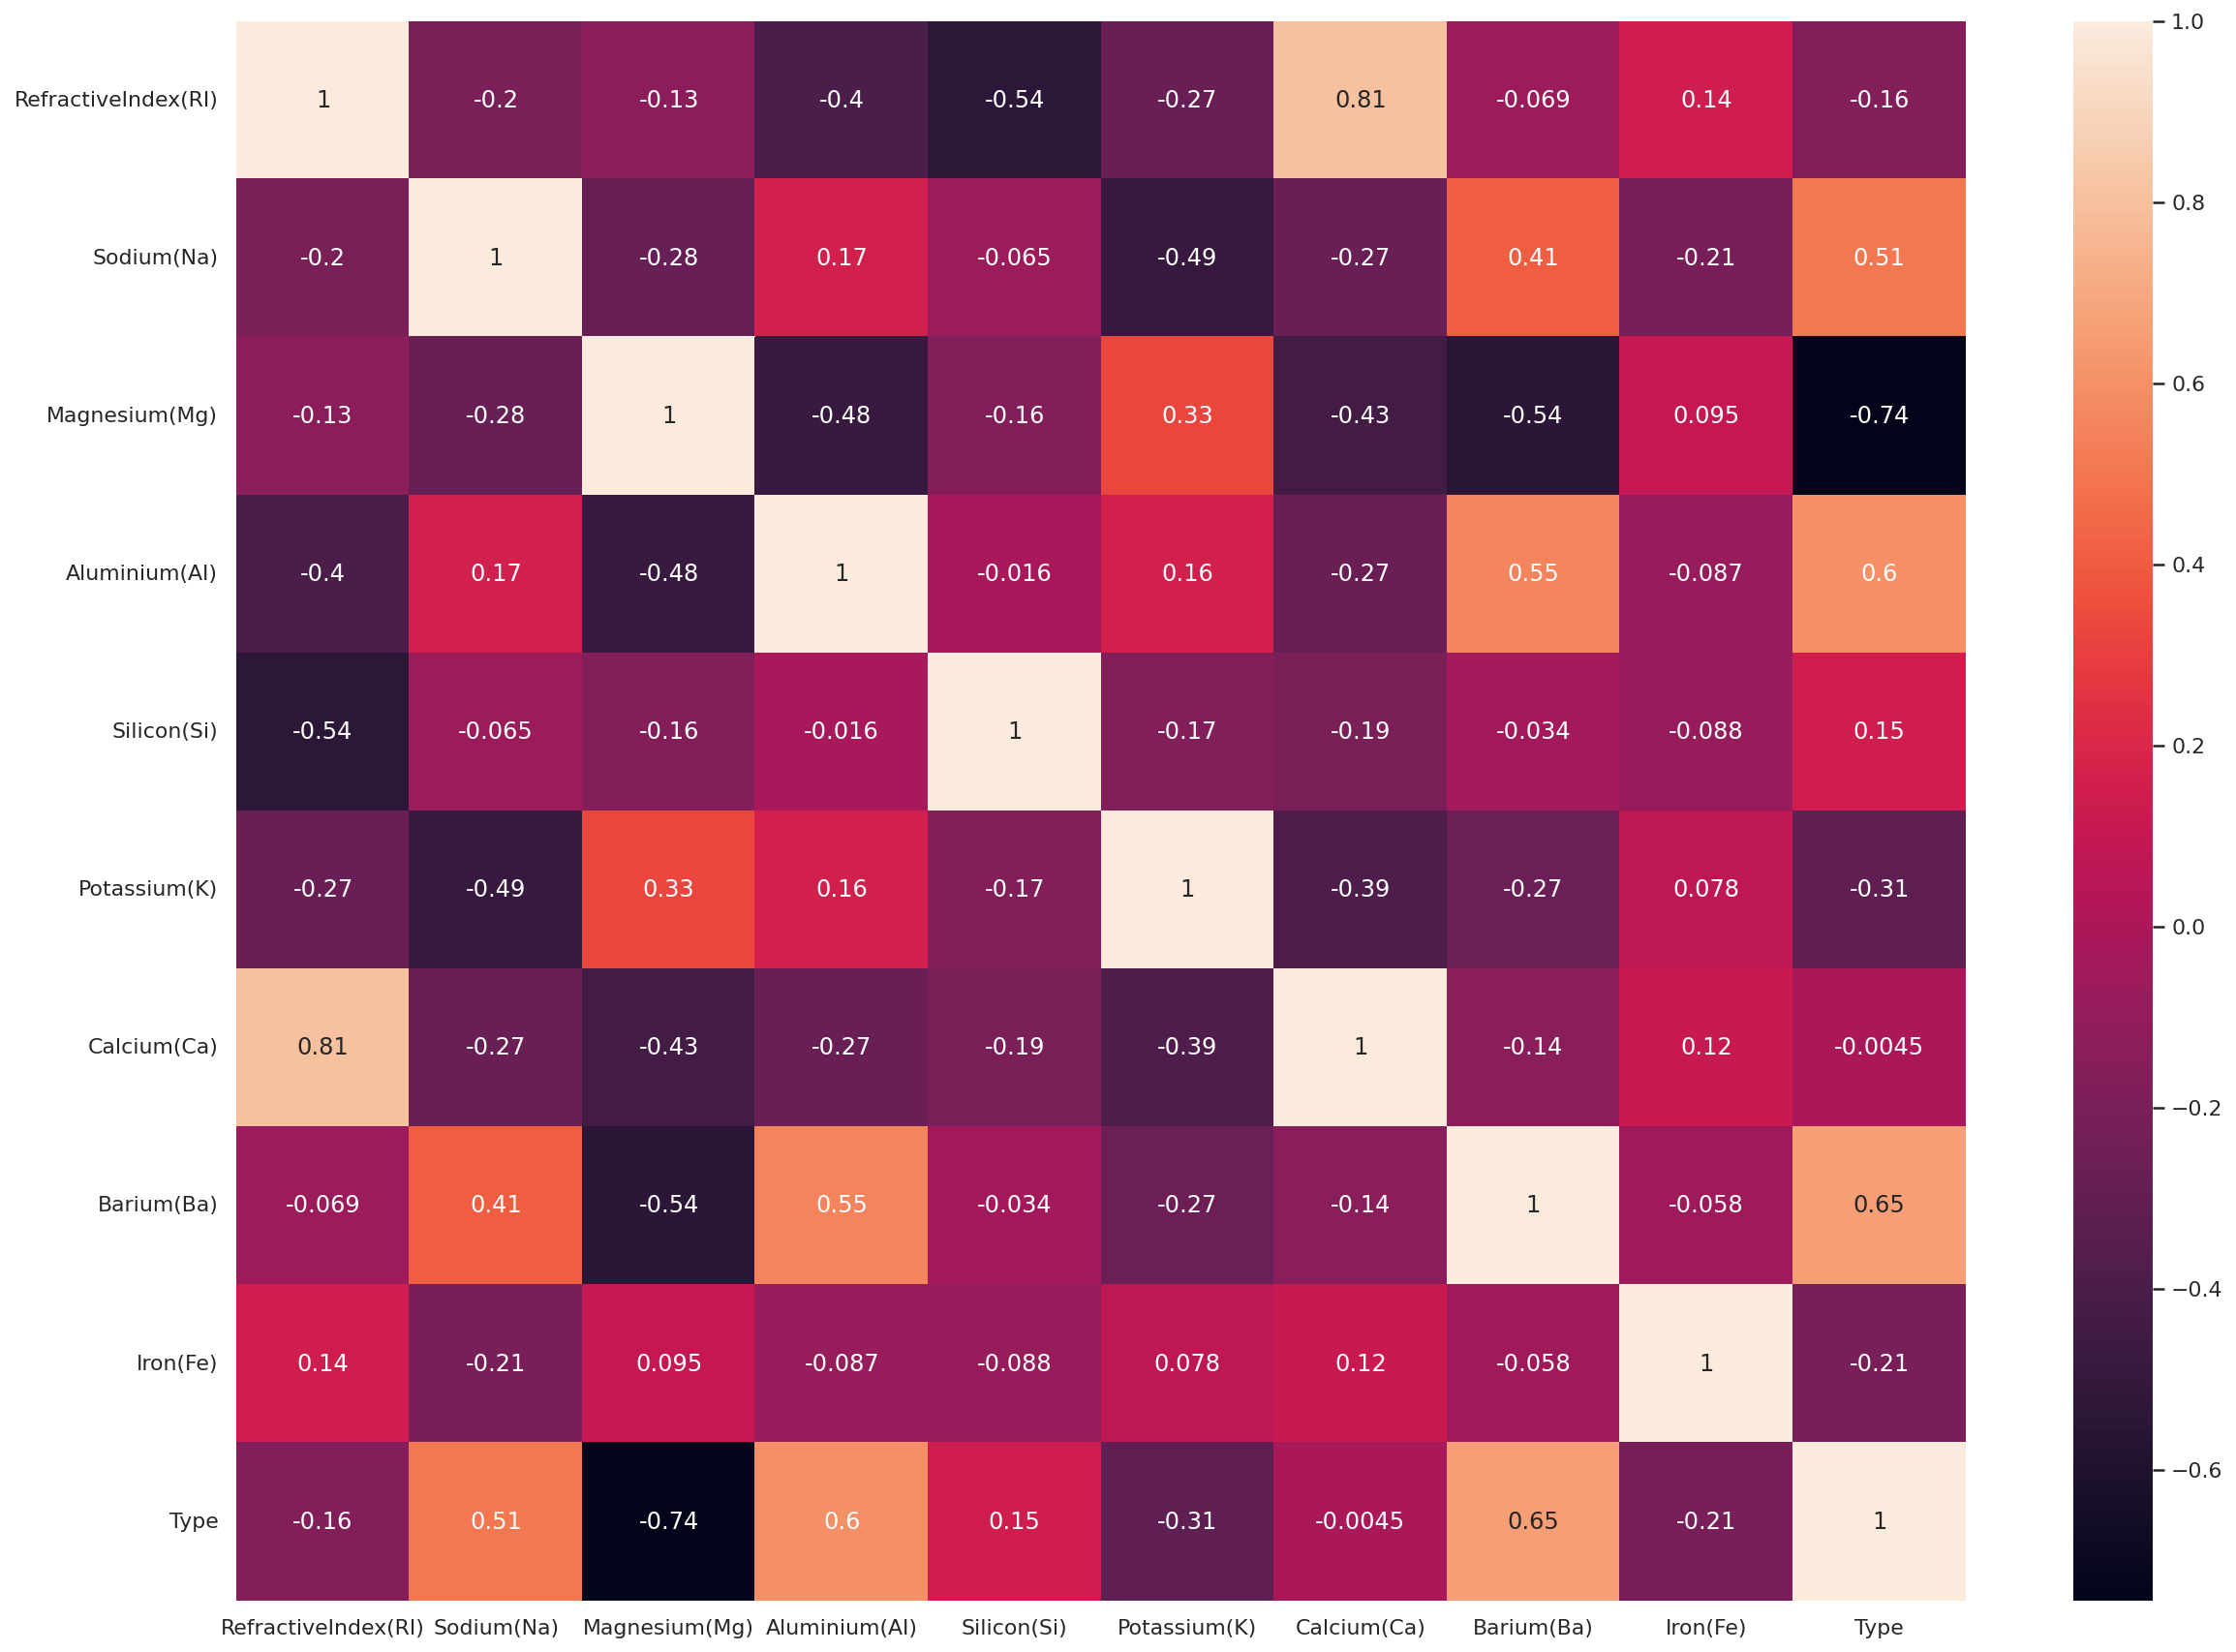

In [330]:
plt.figure(figsize=(20,15))
sns.heatmap(glass.corr(),annot=True)

# Feature Transformation

In [322]:
glass.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
RefractiveIndex(RI),1.648017,5.038907
Sodium(Na),0.465699,3.083933
Magnesium(Mg),-1.146096,-0.426338
Aluminium(AI),0.938402,2.116563
Silicon(Si),-0.744646,3.021864
Potassium(K),6.545429,54.542640
Calcium(Ca),2.050752,6.671054
Barium(Ba),3.406749,12.464936
Iron(Fe),1.747173,2.634023
Type,1.108861,-0.294177


In [323]:
glass['RefractiveIndex(RI)'] = np.sqrt(glass['RefractiveIndex(RI)'])
glass['Potassium(K)'] = np.sqrt(glass['Potassium(K)'])
glass['Calcium(Ca)'] = np.sqrt(glass['Calcium(Ca)'])
glass['Barium(Ba)'] = np.sqrt(glass['Barium(Ba)'])
glass['Iron(Fe)'] = np.sqrt(glass['Iron(Fe)'])

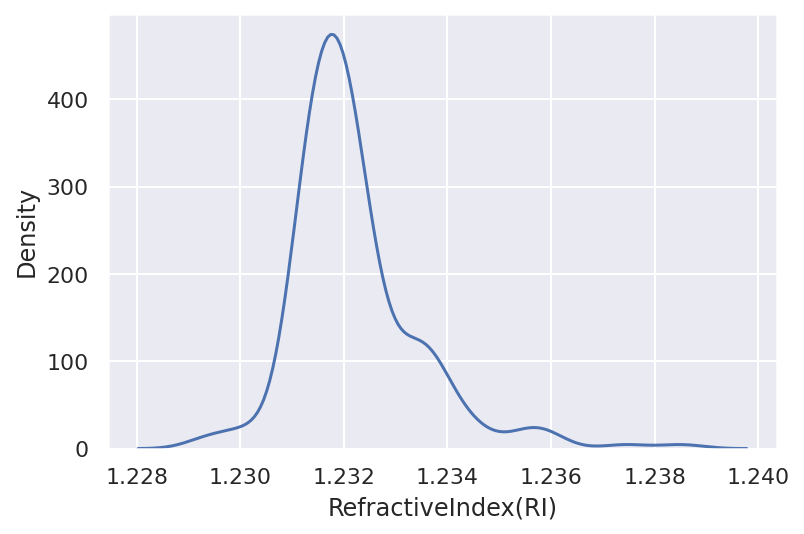

<Figure size 432x288 with 0 Axes>

In [324]:
sns.kdeplot(glass['RefractiveIndex(RI)'])
fig = plt.figure()

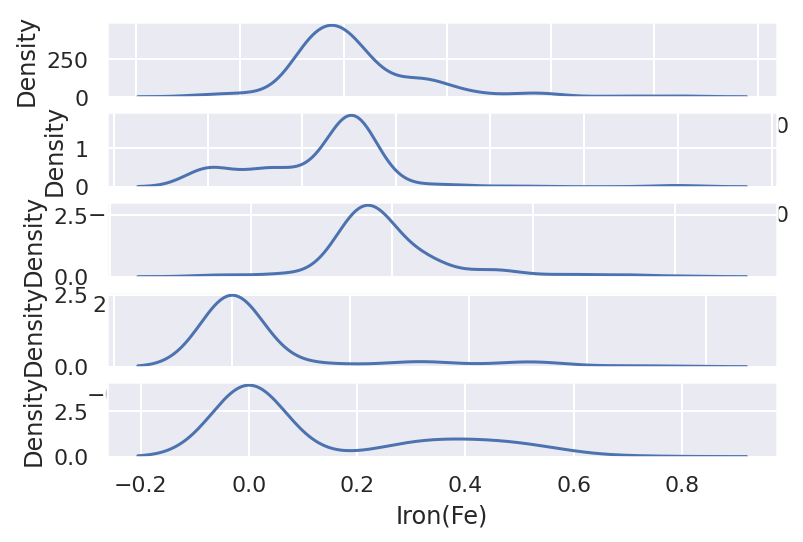

In [325]:
fig,axes=plt.subplots(5)
sns.kdeplot(glass['RefractiveIndex(RI)'],ax=axes[0])
sns.kdeplot(glass['Potassium(K)'],ax=axes[1])
sns.kdeplot(glass['Calcium(Ca)'],ax=axes[2])
sns.kdeplot(glass['Barium(Ba)'],ax=axes[3])
sns.kdeplot(glass['Iron(Fe)'],ax=axes[4])

In [326]:
glass.head()

,RefractiveIndex(RI),Sodium(Na),Magnesium(Mg),Aluminium(AI),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type
0,1.233292,13.64,4.49,1.10,71.78,0.244949,2.958040,0.0,0.0,1
1,1.231913,13.89,3.60,1.36,72.73,0.692820,2.798214,0.0,0.0,1
2,1.231333,13.53,3.55,1.54,72.99,0.624500,2.789265,0.0,0.0,1
3,1.231933,13.21,3.69,1.29,72.61,0.754983,2.867054,0.0,0.0,1
4,1.231836,13.27,3.62,1.24,73.08,0.741620,2.840775,0.0,0.0,1


# MODELS

In [345]:
x=glass.loc[:,glass.columns!='Type']
y=glass['Type']

In [346]:
y = pd.DataFrame(y,columns=['Type'])

In [347]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [348]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 9)
(43, 9)
(170, 1)
(43, 1)


**Logistic Regression**

In [390]:
lr=LogisticRegression(random_state = 0,n_jobs = -1,max_iter=2000)
clf_l = lr.fit(x_train,y_train)
y_pred_log = clf_l.predict(x_test)
acc_l=accuracy_score(y_test,y_pred_log)*100
print('accuracy score is -',accuracy_score(y_test,y_pred_log)*100)
print('')
print('--------------Classification Report------------------')
print(classification_report(y_test,y_pred_log))

accuracy score is - 67.44186046511628

--------------Classification Report------------------
              precision    recall  f1-score   support

           1       0.76      0.72      0.74        18
           2       0.56      0.77      0.65        13
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         3

    accuracy                           0.67        43
   macro avg       0.64      0.75      0.68        43
weighted avg       0.60      0.67      0.63        43



Text(30.5, 0.5, 'Actual')

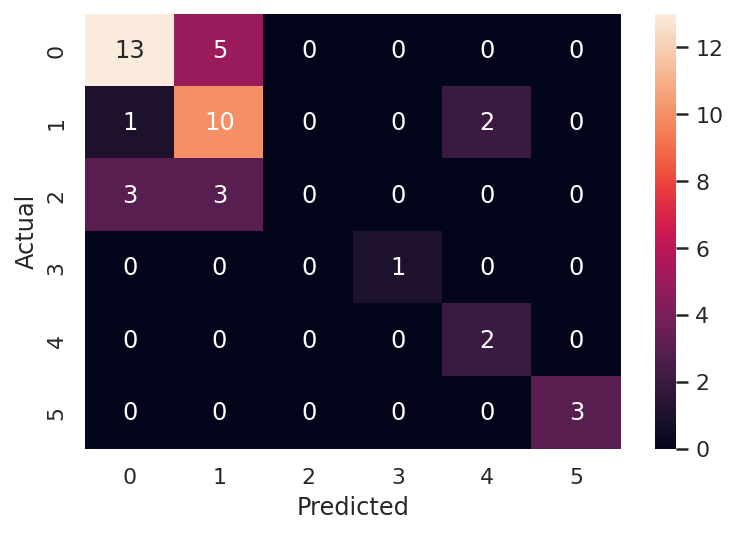

In [391]:
cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm,annot=True)            
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Random Forest Classifier**

In [392]:
rfc = RandomForestClassifier(random_state = 1,n_jobs = -1,n_estimators=150,criterion='gini')
clf_r = rfc.fit(x_train,y_train)
y_pred_r = clf_r.predict(x_test)
r_acc=accuracy_score(y_test,y_pred_r)*100
print('accuracy score is -',accuracy_score(y_test,y_pred_r)*100)
print('')
print('--------------Classification Report------------------')
print(classification_report(y_test,y_pred_r))

accuracy score is - 81.3953488372093

--------------Classification Report------------------
              precision    recall  f1-score   support

           1       0.88      0.83      0.86        18
           2       0.85      0.85      0.85        13
           3       0.60      0.50      0.55         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         3

    accuracy                           0.81        43
   macro avg       0.80      0.86      0.82        43
weighted avg       0.83      0.81      0.81        43



Text(30.5, 0.5, 'Actual')

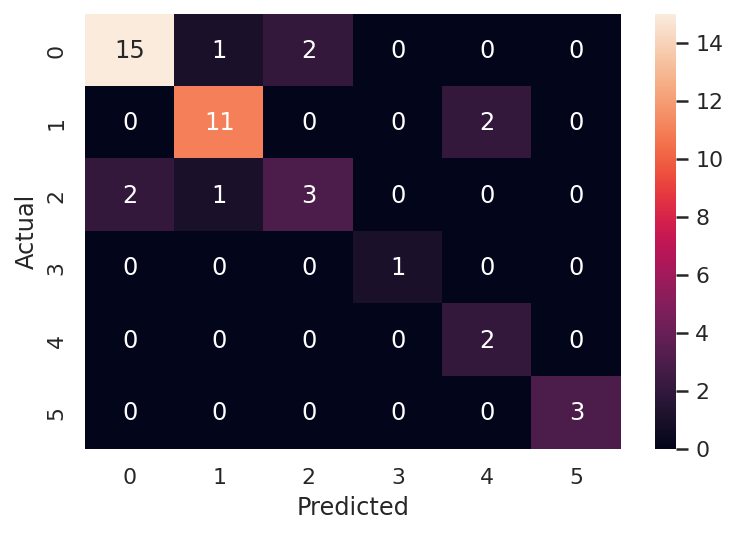

In [393]:
cm=confusion_matrix(y_test,y_pred_r)
sns.heatmap(cm,annot=True)            
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Xgboost Classifier**

In [394]:
xgbc = XGBClassifier(n_jobs = -1,n_estimators=150,learning_rate=0.05)
clf_x = xgbc.fit(x_train,y_train)
y_pred_x = clf_x.predict(x_test)
acc_x=accuracy_score(y_test,y_pred_x)*100
print(accuracy_score(y_test,y_pred_x)*100)
print('')
print('--------------Classification Report------------------')
print(classification_report(y_test,y_pred_x))

69.76744186046511

--------------Classification Report------------------
              precision    recall  f1-score   support

           1       0.68      0.72      0.70        18
           2       0.77      0.77      0.77        13
           3       0.25      0.17      0.20         6
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         3

    accuracy                           0.70        43
   macro avg       0.73      0.78      0.75        43
weighted avg       0.68      0.70      0.68        43



Text(30.5, 0.5, 'Actual')

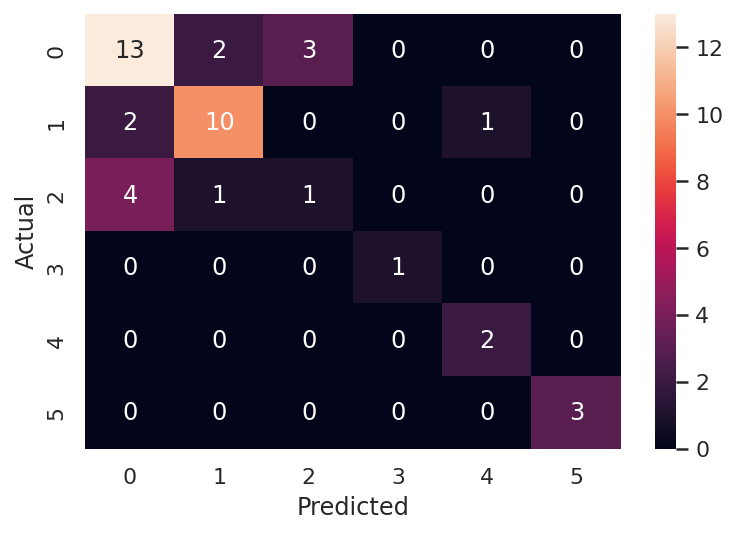

In [395]:
cm=confusion_matrix(y_test,y_pred_x)
sns.heatmap(cm,annot=True)            
plt.xlabel('Predicted')
plt.ylabel('Actual')

**AdaBoost Classifier With Random Forest Classifier**

In [396]:
ada=AdaBoostClassifier(random_state=0,base_estimator=rfc)
clf_a=ada.fit(x_train,y_train)
y_pred_ada = clf_a.predict(x_test)
acc_ada=accuracy_score(y_test,y_pred_ada)*100
print(accuracy_score(y_test,y_pred_ada)*100)
print('')
print('--------------Classification Report------------------')
print(classification_report(y_test,y_pred_ada))

79.06976744186046

--------------Classification Report------------------
              precision    recall  f1-score   support

           1       0.88      0.78      0.82        18
           2       0.80      0.92      0.86        13
           3       0.40      0.33      0.36         6
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         3

    accuracy                           0.79        43
   macro avg       0.79      0.84      0.81        43
weighted avg       0.79      0.79      0.78        43



Text(30.5, 0.5, 'Actual')

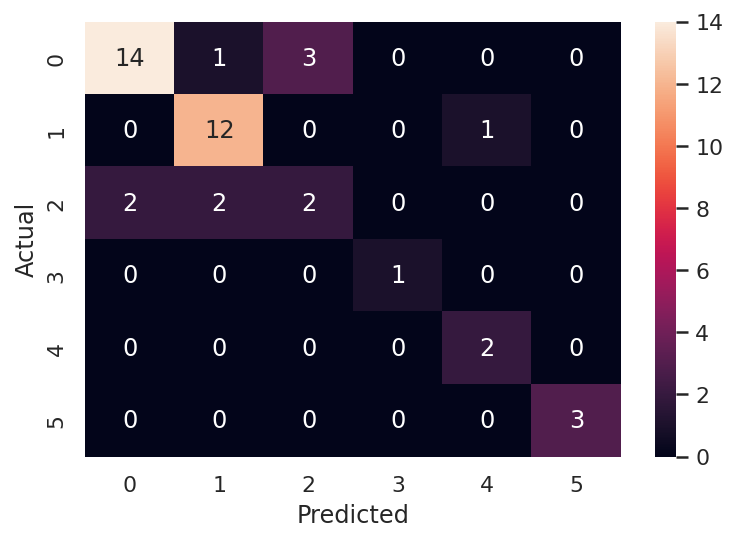

In [397]:
cm=confusion_matrix(y_test,y_pred_ada)
sns.heatmap(cm,annot=True)            
plt.xlabel('Predicted')
plt.ylabel('Actual')




# Model Comparisons

In [403]:
model_df = pd.DataFrame({
    'Models' : ['Logistic Regression', 'Random Forest Classifier','XGBoost','AdaBoost Classifier With Random Forest Classifier'],
    'Accuracy Score' : [acc_l,r_acc,acc_x,acc_ada]   
})
round(model_df.sort_values(by = 'Accuracy Score',ascending=False),3)

,Models,Accuracy Score
1,Random Forest Classifier,81.395
3,AdaBoost Classifier With Random Forest Classifier,79.070
2,XGBoost,69.767
0,Logistic Regression,67.442




#Export Model

In [405]:
pickle.dump(rfc,open('rfc_glass_model.pkl','wb'))